In [14]:
import numpy as np
import matplotlib.pyplot as plt
import polars as pl
import pandas as pd
from statsmodels.graphics.tsaplots import plot_acf

# 問題 1.3

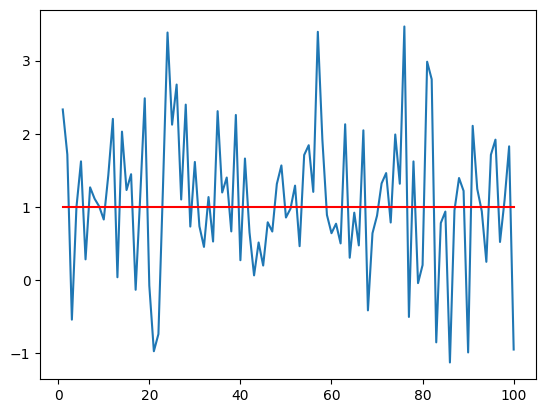

In [2]:
mu = 1
sigma = 1

np.random.seed(10)
X = np.linspace(1,100, 100)
Y = np.random.normal(0, sigma, len(X)) + mu
plt.plot(X, Y)
plt.plot(X, [mu]*len(X), color = "red")

## 問題1.5

In [3]:
data ="./Data/economicdata.xls"
df = pd.read_excel(data)
df = pl.from_pandas(df).rename({"Unnamed: 0": "Date"}).with_columns(pl.col("Date").cast(pl.Date))

In [4]:
df.head()

Date,nikkei225,topix,indprod,exrate,cpi,saunemp,intrate
date,f64,f64,f64,f64,f64,f64,f64
1975-01-01,3767.09,276.09,47.33,29.13,52.625,1.7,12.67
1975-02-01,4100.97,299.81,46.86,29.7,52.723,1.8,13.0
1975-03-01,4300.08,313.5,46.24,29.98,53.114,1.8,12.92
1975-04-01,4435.26,320.57,47.33,29.8,54.092,1.8,12.02
1975-05-01,4506.24,329.65,47.33,29.79,54.385,1.8,11.06


## (1) 

Text(0, 0.5, 'topix')

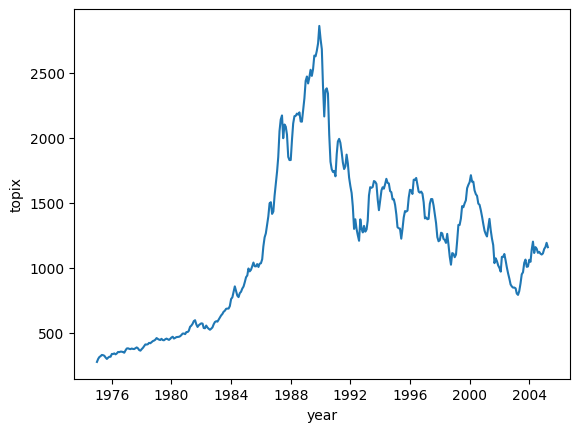

In [5]:
plt.plot(df.get_column("Date"), df.get_column("topix"))
plt.xlabel("year")
plt.ylabel("topix")

## (2)

/tmp/ipykernel_1240/892653223.py:7: DeprecationWarning: `with_column` has been deprecated in favor of `with_columns`. This method will be removed in version 0.17.0
  df = df.with_column(pl.col(label).log().diff().alias(to_label))


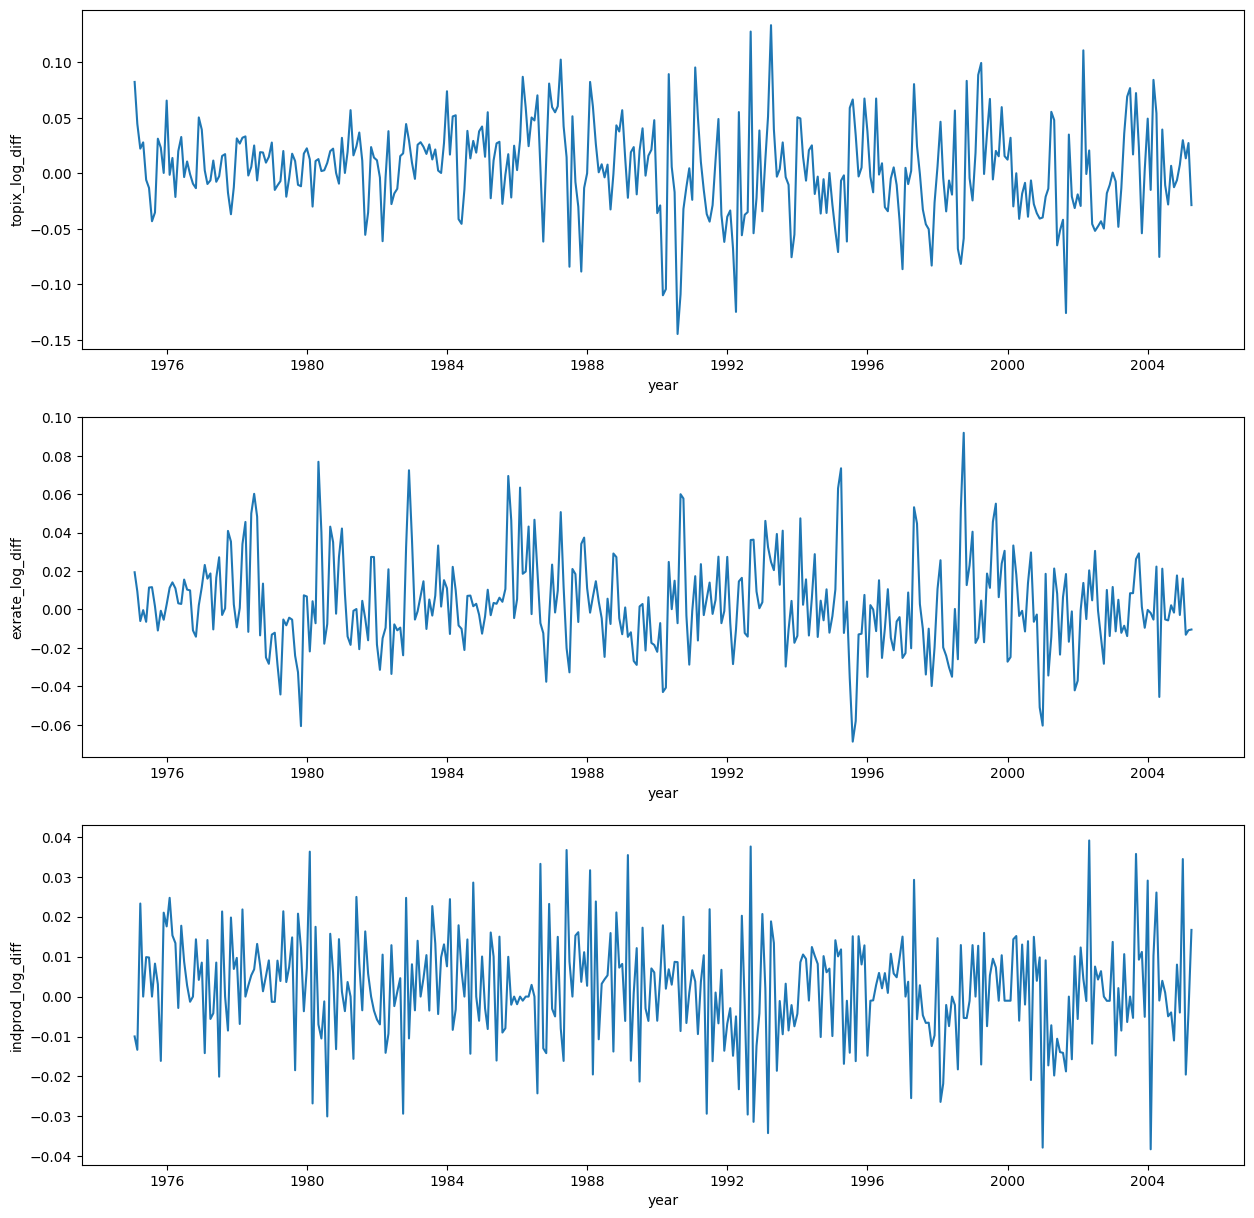

In [6]:
fig, axes = plt.subplots(3,1,figsize = (15, 15))
labels = ["topix","exrate","indprod"]

for idx, label in enumerate(labels):    
    to_label = f"{label}_log_diff"
    if to_label not in df.columns:
        df = df.with_column(pl.col(label).log().diff().alias(to_label))
    axes[idx].plot(df.get_column("Date"), df.get_column(to_label))
    axes[idx].set_xlabel("year")
    axes[idx].set_ylabel(to_label)
    

## (5)

In [13]:
to_label

'indprod_log_diff'

In [17]:
df.get_column(to_label).head()

indprod_log_diff
f64
null
-0.00998
-0.013319
0.023299
0.0
0.009881
0.009785
0.0
0.008253


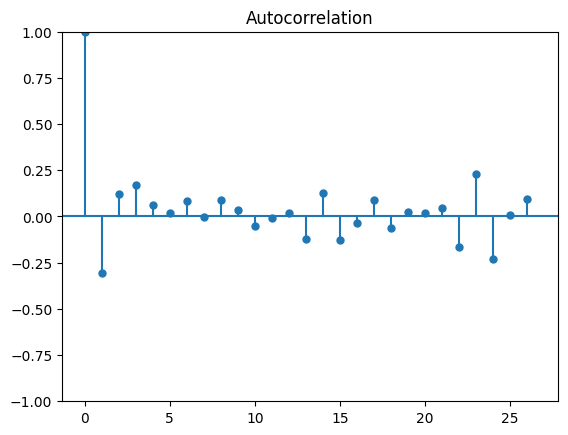

In [33]:
plot_acf(df.get_column(to_label).to_numpy(), missing = "drop", alpha = 0.99);